In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


## loss img compression

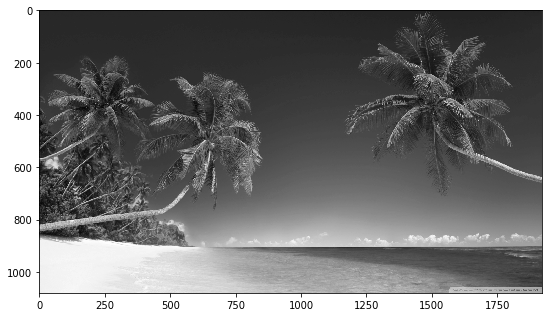

In [5]:
# load image in gray scale color & display
img = cv2.imread('t.jpg', 0)

plt.figure(figsize=(9, 6))
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(1080, 1920)

In [7]:
#for skinny matrix -> economy svd(full_matrices=False) gives speed
U, D, V = np.linalg.svd(img, full_matrices=False)

In [8]:
U.shape

(1080, 1080)

In [9]:
V.shape

(1080, 1920)

In [10]:
D.shape

(1080,)

In [12]:
#truncate U matrix
np.matrix(U[:, :2]).shape

(1080, 2)

In [13]:
#truncate D matrix
np.diag(D[:2]).shape

(2, 2)

In [14]:
#truncate V matrix
np.matrix(V[:2, :]).shape

(2, 1920)

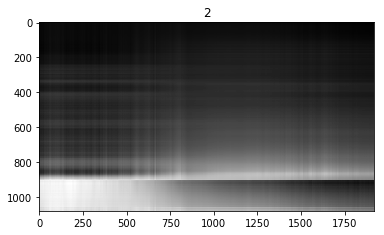

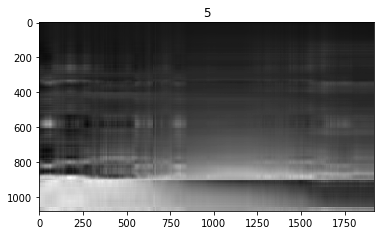

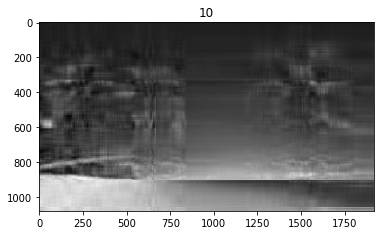

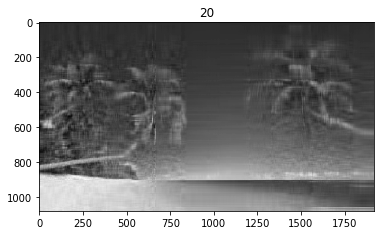

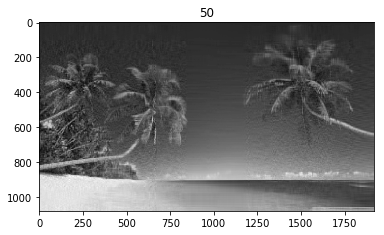

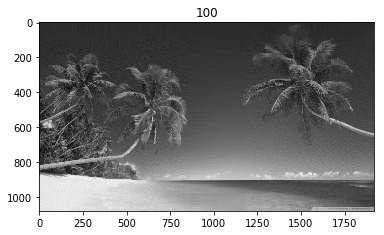

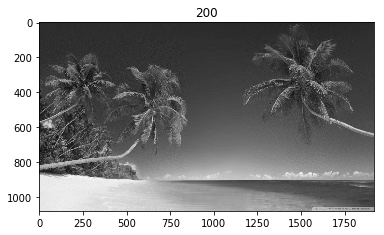

In [16]:
#result images for several truncates

for rank in [2, 5, 10, 20, 50, 100, 200]:

    reconstimg = np.matrix(U[:, :rank]) @ np.diag(D[:rank]) @ np.matrix(V[:rank, :])
    plt.imshow(reconstimg, cmap='gray')
    
    plt.title(rank)
    plt.show()

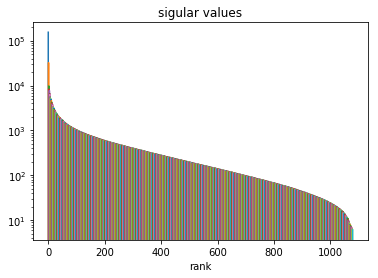

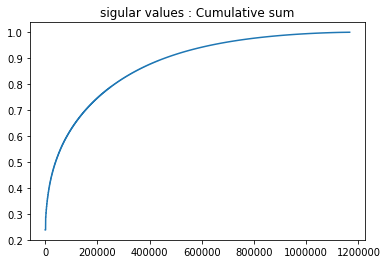

In [83]:
plt.figure(1)
plt.semilogy(np.diag(D)) #plot in log scale

plt.title("sigular values")
plt.xlabel("rank")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(D)) / np.sum(np.diag(D)))

plt.title("sigular values : Cumulative sum")
plt.show()